In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from math import sqrt
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

from matplotlib.ticker import ScalarFormatter


Welcome to JupyROOT 6.26/04


In [2]:
from math import sqrt

# Error-weighted combination function
def combine_error_weighted(x, y, x_err, y_err):
    central_value = (x / x_err**2 + y / y_err**2) / (1 / x_err**2 + 1 / y_err**2)
    error = 1 / sqrt(1 / x_err**2 + 1 / y_err**2)
    return central_value, error

In [3]:
# signal_eff_error = math.sqrt(signal_eff * (1 - signal_eff) / N_gen)

def calculate_sig_eff_err(eff, N_gen):

    error = math.sqrt(eff * (1 - eff) / N_gen)
    return error

# Acp(D+ -> eta pi+)

In [4]:
central_value_1 = 0.0009242824562171239
stat_unc_1 = 0.006779411675925407
central_value_2 =  0.009096314515477846
stat_unc_2 = 0.009971820709183109

combined_central_value, combined_error = combine_error_weighted(central_value_1, central_value_2, stat_unc_1, stat_unc_2)


In [5]:
combined_error

0.005606448062405191

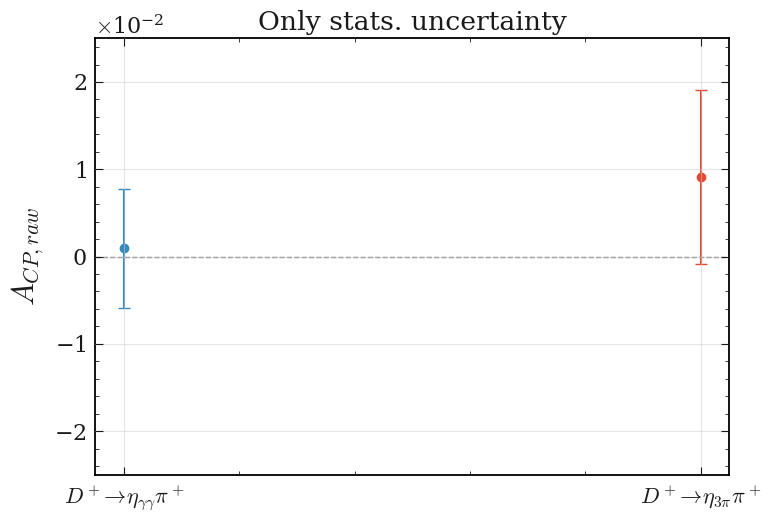

In [145]:
# Plotting
plt.errorbar(1, central_value_1, yerr=stat_unc_1, fmt='o', capsize=4)
plt.errorbar(2, central_value_2, yerr=stat_unc_2, fmt='o', capsize=4)
# plt.errorbar(3, combined_central_value, yerr=combined_error, fmt='o', capsize=4)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# plt.xticks([1, 2, 3], [r'$D^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D^+ \to \eta_{3\pi} \pi^+$', 'Combined'], fontsize=14)
plt.xticks([1, 2], [r'$D^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D^+ \to \eta_{3\pi} \pi^+$'])

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel(r'$A_{CP,raw}$')
plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")

plt.ylim(-2.5*0.01 , 2.5*0.01)
plt.tight_layout()
plt.savefig("MC15ri_427_87_etapip_Acp.png")
plt.show()

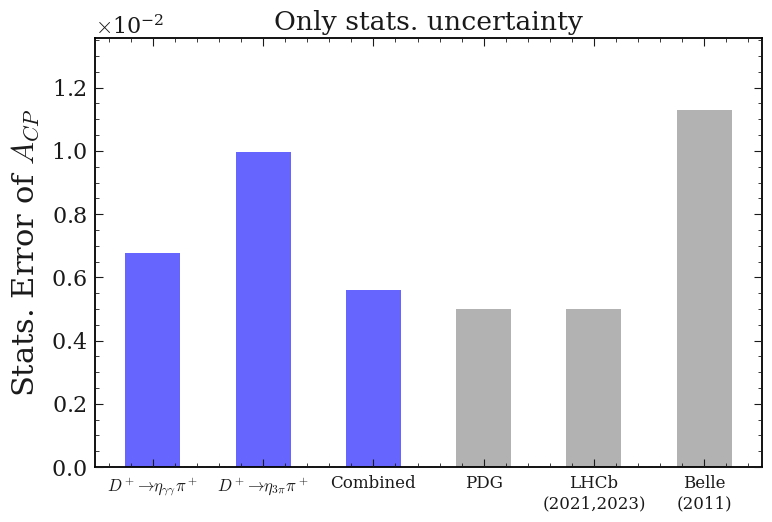

In [146]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Define the errors as bar heights
errors = [stat_unc_1, stat_unc_2, combined_error, 0.005, 0.005, 0.0113]

colors = ['blue', 'blue', 'blue', 'gray', 'gray', 'gray', 'gray']

# Plotting error bars as a bar graph
plt.bar([1, 2, 3, 4, 5, 6], errors, color=colors , alpha=0.6, width=0.5)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Customizing plot
plt.xticks([1, 2, 3, 4, 5, 6], [r'$D^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D^+ \to \eta_{3\pi} \pi^+$', 'Combined','PDG','LHCb\n(2021,2023)', 'Belle\n(2011)'], fontsize=12)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel(r'Stats. Error of $A_{CP}$')
# plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")

plt.ylim(0, max(errors) * 1.2)  # Adjusting y-limit to show error bars fully
plt.tight_layout()

# Save and display
plt.savefig("MC15ri_427_87_etapip_Acp_error_bars.png")
plt.show()


# Acp(Ds+ -> eta pi+)

In [147]:
central_value_1 = -0.00031296416058910613
stat_unc_1 = 0.004314619540631353
central_value_2 = 0.0024748054644076955
stat_unc_2 = 0.006560551820092353

combined_central_value, combined_error = combine_error_weighted(central_value_1, central_value_2, stat_unc_1, stat_unc_2)


In [148]:
combined_error

0.003604893586837576

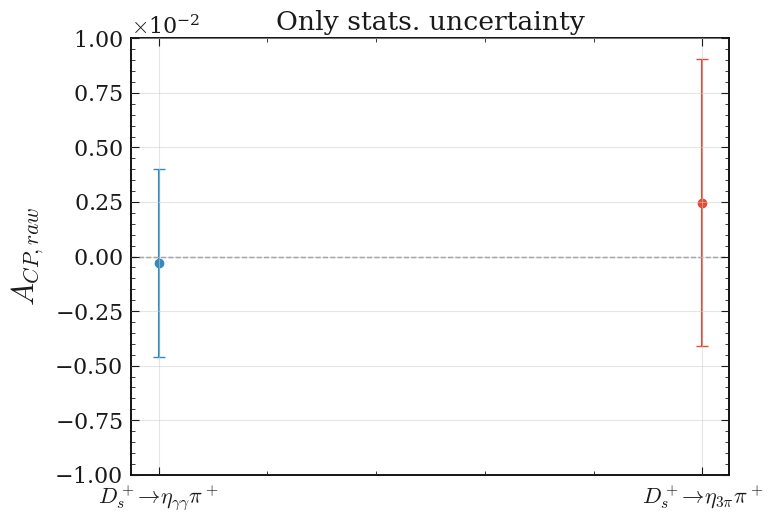

In [149]:
# Plotting
plt.errorbar(1, central_value_1, yerr=stat_unc_1, fmt='o', capsize=4)
plt.errorbar(2, central_value_2, yerr=stat_unc_2, fmt='o', capsize=4)
# plt.errorbar(3, combined_central_value, yerr=combined_error, fmt='o', capsize=4)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# plt.xticks([1, 2, 3], [r'$D_s^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D_s^+ \to \eta_{3\pi} \pi^+$', 'Combined'], fontsize=14)
plt.xticks([1, 2], [r'$D_s^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D_s^+ \to \eta_{3\pi} \pi^+$'])

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel(r'$A_{CP,raw}$')
plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")

plt.ylim(-1*0.01 , 1*0.01)

plt.tight_layout()
plt.savefig("MC15ri_427_87_etapip_Acp_Ds.png")
plt.show()

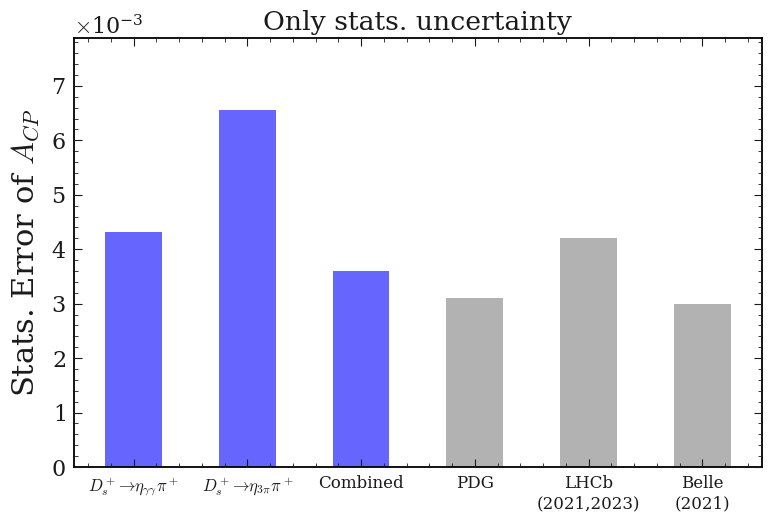

In [150]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Define the errors as bar heights
errors = [stat_unc_1, stat_unc_2, combined_error, 0.0031, 0.0042, 0.003]

colors = ['blue', 'blue', 'blue', 'gray', 'gray', 'gray', 'gray']
# Plotting error bars as a bar graph
plt.bar([1, 2, 3, 4, 5, 6], errors, color=colors, alpha=0.6, width=0.5)

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Customizing plot
plt.xticks([1, 2, 3, 4, 5, 6], [r'$D_s^+ \to \eta_{\gamma\gamma} \pi^+$', r'$D_s^+ \to \eta_{3\pi} \pi^+$', 'Combined','PDG','LHCb\n(2021,2023)','Belle\n(2021)'], fontsize=12)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.ylabel(r'Stats. Error of $A_{CP}$')
# plt.grid(True, alpha=0.5)
plt.title("Only stats. uncertainty")

plt.ylim(0, max(errors) * 1.2)  # Adjusting y-limit to show error bars fully
plt.tight_layout()

# Save and display
plt.savefig("MC15ri_427_87_etapip_Acp_error_bars_Ds.png")
plt.show()